In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

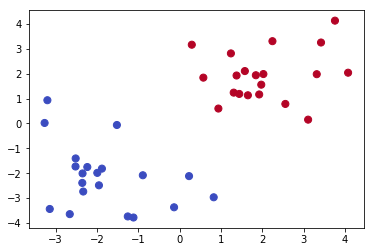

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

The equation for the separating hyperplane is: y = -1.177 * (x1 - 0.0767) 



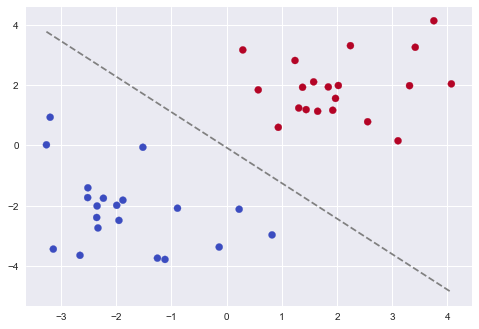

In [3]:
from sklearn import svm
import seaborn as sns

# Train the SVM
clf = svm.SVC(kernel='linear', C=100000)
clf.fit(X,Y)

# Create and report the SVM line
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(X.min()[0], X.max()[0]) 
x2 = a * x1 - clf.intercept_[0] / w[1]
print('The equation for the separating hyperplane is: y = {:.4} * (x1 - {:.3}) \n'.format(a, clf.intercept_[0]/w[1]))

# Plot the corresponding line and the original data
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.plot(x1, x2, '--', c='grey')
plt.show()

#### b. List the support vectors.

In [4]:
vecs = clf.support_vectors_
print('Support Vectors:')
for i in vecs:
    print ('[{:.6}, {:.6}]'.format(i[0], i[1]))

Support Vectors:
[0.226275, -2.11811]
[-1.51804, -0.0639938]
[0.935646, 0.596936]


#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

Upper Hyperplane: y_upper = -1.177 * x1 + 1.698
Lower Hyperplane: y_lower = -1.177 * x1 + -1.852



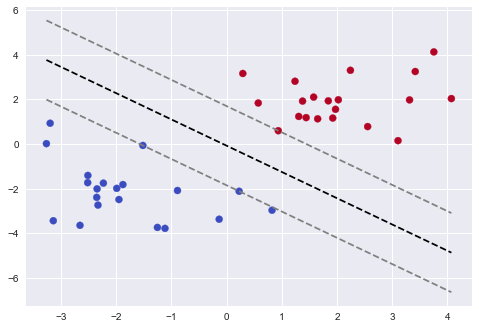

In [5]:
# Calculate and report the upper hyperplane
b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])
print('Upper Hyperplane: y_upper = {:.4} * x1 + {:.4}'.format(a, b[1]-a*b[0]))

# Calculate and report the lower hyperplane
b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])
print('Lower Hyperplane: y_lower = {:.4} * x1 + {:.4}\n'.format(a, b[1]-a*b[0]))

# Plot
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.plot(x1, x2, 'k--')
plt.plot(x1, x2_down, '--', c='grey')
plt.plot(x1, x2_up, '--', c='grey')
plt.show()

#### d. Compute the width of the margin.

In [6]:
margin_width = (x2_up - x2_down)[0] # just take the first value, as all values identical (by definition, because the lines are parellel)
print('Width of Margin = {:.5f}'.format(margin_width))

Width of Margin = 3.54990


#### e. What would you expect to happen to the margin if the constant C was made very small?

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.<br><br>
**Answer:** Intuitively, a significantly lower value of 'C' will cause greater pull from slack variables, moving away from just the two closest opposing categories, and allowing the influence of other points. This will increase our margin. Let's run some code to try this out: 

In [7]:
# Find the margin with a significantly lower value for 'C'

clf2 = svm.SVC(kernel='linear', C=.00001)
clf2.fit(X,Y)

b = clf2.support_vectors_[-1]
x2_up_2 = a * x1 + (b[1] - a * b[0])

b = clf2.support_vectors_[0]
x2_down_2 = a * x1 + (b[1] - a * b[0])

margin_width_2 = (x2_up_2 - x2_down_2)[0] # just take the first value, as all values identical (by definition, because the lines are parellel)
print('Width of Margin = {:.5f}'.format(margin_width_2))

Width of Margin = 6.88056


Sure enough, our intuitions are confirmed.

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following two questions:

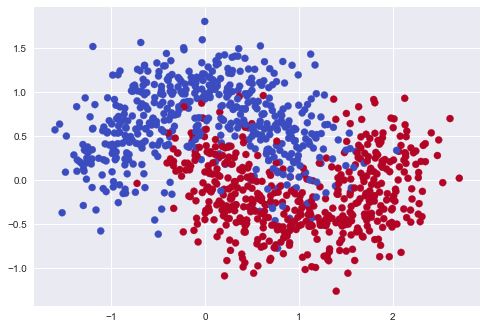

In [8]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [9]:
clf = svm.SVC(kernel='poly')
clf.fit(X_train, Y_train)

correct_train=1.0*(clf.predict(X_train)==np.asarray(Y_train)).sum()/len(Y_train)
correct_test=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

print('In-Sample Classification Accuracy: {:.4}%'.format(correct_train * 100))
print('Out-Of-Sample Classification Accuracy: {:.4}%'.format(correct_test * 100))

In-Sample Classification Accuracy: 81.34%
Out-Of-Sample Classification Accuracy: 82.73%


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


Best Value for 'C': 0.146666


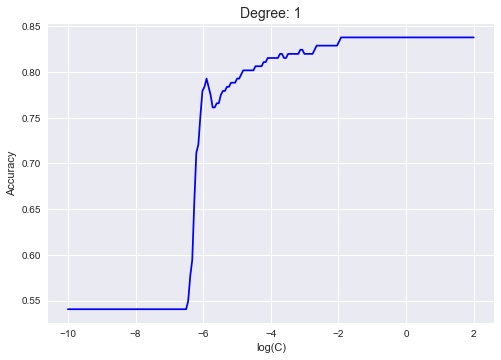

Best Value for 'C': 0.344615


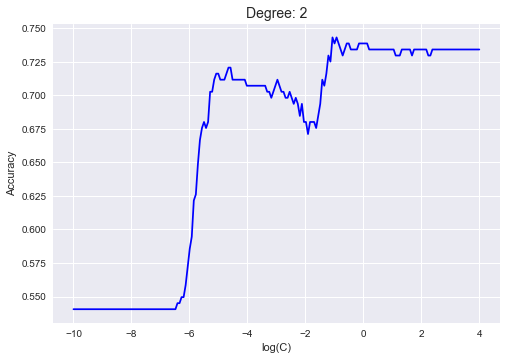

Best Value for 'C': 9.21752


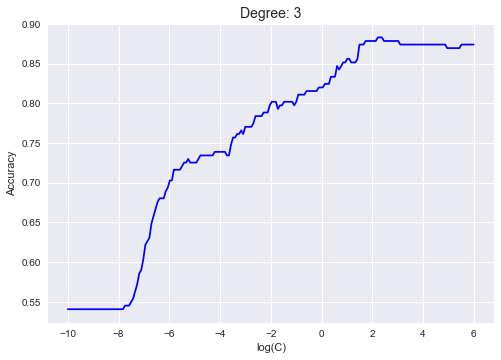

Best Value for 'C': 6.35503


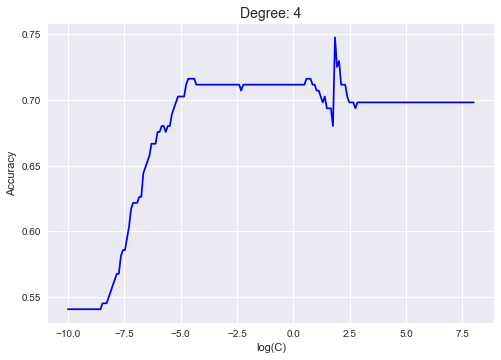

In [10]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

degrees = range(1,5)

for degree in degrees:
    C = [np.exp(i) for i in np.linspace(-10,2*degree,200)]
    OS_validation = []
    for c in C:
        clf = svm.SVC(kernel='poly', degree=degree, C=c)
        clf.fit(X_train, Y_train)
        correct = 1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_validation.append(correct)
        
    print('Best Value for \'C\': {:.6}'.format(C[OS_validation.index(max(OS_validation))]))
        
    temp=pd.DataFrame([C,OS_validation]).T
    C=[np.log(y) for y in C] # for a better graph
    plt.gca()
    plt.plot(C,OS_validation,'b',)
    #plt.legend(loc='upper right')
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.title('Degree: {}'.format(degree), size=14)
    plt.show()

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [11]:
clf = svm.SVC(kernel='poly', degree=3, C=9.21752)
clf.fit(X_train, Y_train)
correct = 1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
print('Out-of-Sample Accuracy with optimal degrees and C: {:.5}%'.format(correct * 100))

Out-of-Sample Accuracy with optimal degrees and C: 88.288%


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes


### a) Calculate the following sample probabilities:

P(Yes) **60%**

P(No) **40%**

P(Red|Yes) **83.33%**

P(SUV|Yes) **33.33%**

P(Domestic|Yes) **50.00%**

P(Red|No) **25.00%**

P(SUV|No) **75.00%**

P(Domestic|No) **50.00%**

### b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen?

In [29]:
p_yes = .6
p_red_yes = .8333
p_suv_yes = .3333
p_dom_yes = .5
num_yes = p_yes * p_red_yes * p_suv_yes * p_dom_yes

p_no = 1 - p_yes
p_red_no = 1 - p_red_yes
p_suv_no = 1 - p_suv_yes
p_dom_no = 1 - p_dom_yes
num_no = p_no * p_red_no * p_suv_no * p_dom_no

p_red_dom_suv = num_yes / (num_yes + num_no)

print("The calculated probibility for a red, domestic SUV being stolen is {:.4}%".format(p_red_dom_suv * 100))

The calculated probibility for a red, domestic SUV being stolen is 78.94%


## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [16]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

X_train.head()

,t_pre,glu,blood_p,triceps,serum,b_m,pedigree_f,age
0,3.0,158.0,64.0,13.0,387.0,31.2,0.295,24.0
1,0.0,84.0,64.0,22.0,66.0,35.8,0.545,21.0
2,9.0,120.0,72.0,22.0,56.0,20.8,0.733,48.0
3,4.0,110.0,76.0,20.0,100.0,28.4,0.118,27.0
4,2.0,100.0,66.0,20.0,90.0,32.9,0.867,28.0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [17]:
from sklearn.naive_bayes import GaussianNB

np.random.seed(42)

gnb = GaussianNB()
trained_model = gnb.fit(X_train, y_train)

in_acc = sum(trained_model.predict(X_train) == y_train)/len(y_train)
out_acc = sum(trained_model.predict(X_test) == y_test)/len(y_test)

print('In-Sample Prediction Accuracy: {:.4}%'.format(in_acc *100))
print('Out-Of-Sample Prediction Accuracy: {:.4}%'.format(out_acc *100))

In-Sample Prediction Accuracy: 75.85%
Out-Of-Sample Prediction Accuracy: 79.11%


### b) What is the prior probability of diabetes, learned from the training data?

In [18]:
print("The learned prior probability of diabetes is {:.4}%".format(trained_model.class_prior_[1] * 100))

The learned prior probability of diabetes is 30.08%


### c) What is the mean and variance of each input variable for patients with diabetes?

In [19]:
cols = X_train.columns
means_with_diabetes = trained_model.theta_[1]
variences_with_diabetes = trained_model.sigma_[1]
data = [means_with_diabetes, variences_with_diabetes]
test = pd.DataFrame(data=data, columns=cols, index=['Means', 'Variances'])
print('Mean and Variance for Patients with Diabetes:\n')
print(test)

Mean and Variance for Patients with Diabetes:

               t_pre         glu     blood_p    triceps         serum  \
Means       4.070423  144.140845   74.563380  33.478873    209.211268   
Variances  12.206320  924.768907  187.738953  93.967876  15882.053970   

                 b_m  pedigree_f         age  
Means      35.223944    0.639042   35.788732  
Variances  38.617044    0.190055  103.856786  


### d) What is the mean and variance of each input variable for patients without diabetes?

In [20]:
cols = X_train.columns
means_without_diabetes = trained_model.theta_[0]
variences_without_diabetes = trained_model.sigma_[0]
data = [means_without_diabetes, variences_without_diabetes]
test = pd.DataFrame(data=data, columns=cols, index=['Means', 'Variances'])
print('Mean and Variance for Patients with Diabetes:\n')
print(test)

Mean and Variance for Patients with Diabetes:

              t_pre         glu     blood_p     triceps        serum  \
Means      2.690909  111.466667   69.206061   27.200000   127.006061   
Variances  6.771141  605.994355  136.369672  108.269103  8318.987854   

                 b_m  pedigree_f        age  
Means      31.709091    0.468685  28.393939  
Variances  39.921929    0.084614  72.444824  


## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [21]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print (X_Labeled_train)
print()
print (y_Labeled_train)

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6

0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [22]:
gnb = GaussianNB()
trained_model = gnb.fit(X_Labeled_train, y_Labeled_train)

out_acc = sum(trained_model.predict(X_Labeled_test) == y_Labeled_test)/len(y_Labeled_test)

print('Out-Of-Sample Prediction Accuracy: {:.4}%'.format(out_acc *100))

Out-Of-Sample Prediction Accuracy: 97.22%


### b) Improve the classification by using the unlabeled data, data_Unlabeled, and the EM semi-supervised algorithm to predict the labels of X_Labeled_test, and report the new accuracy.

In [ ]:
naive_bayes_classifier = EM(X_Labeled_train, y_Labeled_train, X_Unlabeled_train, num_iters=50)
for i,j in naive_bayes_classifier.items():
    print (i)
    print (j)
    print ()
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test, naive_bayes_classifier)

# measure accuracy for the binary prediction task
print ('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

In [ ]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print ('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled]) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled])
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [ ]:
# Training a binary Naive Bayes Classifier with discrete input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [ ]:
# Training a binary Gaussian Naive Bayes Classifier with real-valued input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainGaussianNaiveBayes(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_mu1'] = X_1[j].mean()
        nbc[j+'_sigma1'] = X_1[j].std()
        nbc[j+'_mu0'] = X_0[j].mean()
        nbc[j+'_sigma0'] = X_0[j].std()
    return nbc

def testGaussianNaiveBayes(X,nbc):
    y_pred = pd.Series(index=X.index)
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            pdf1 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu1'],scale=nbc[j+'_sigma1'])
            pdf0 = stats.norm.pdf(thevalue,loc=nbc[j+'_mu0'],scale=nbc[j+'_sigma0'])
            y_pred[i] = y_pred[i]*pdf1/pdf0 if pdf0 > 0 else 1E10
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred